In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")#, {"axes.facecolor": ".9"})
sns.set_context("paper")

In [17]:
#paths
my_path = './Results/Results_gene_thicket/'
TCDF_path = './Results/Results_TCDF/'
arboreto_path = './Results/Results_arboreto/'
sincerities_path = './Results/Results_sincerities/'

# My model 

In [4]:
my_data = pd.DataFrame()

for el in os.listdir(my_path): 
    complete_path = os.path.join(my_path, el) #iterate files
    if os.path.isfile(complete_path):
        name = el.split(sep='.')[0]
        levels = el.split(sep='_')[-2]
        temp_df = pd.read_csv(complete_path)
        temp_df.columns = ['name', 'fscore', 'AUPRC', 'AUROC', 'time']
        temp_df['data_set'] = el.split(sep='_')[0]
        drop_outs = np.array([int(el.split(sep='-')[-1]) for el in temp_df['name']])
        temp_df["drop_outs"] = np.where(drop_outs > 49, drop_outs, 0)
        data_type = np.array([el.split(sep='-')[0] for el in temp_df['name']])
        temp_df['data_type'] = np.where(data_type == 'dyn', 'synthetic', 'curated')
        temp_df['model'] = 'gene thicket'
        temp_df['levels'] = int(levels)
        my_data = my_data.append(temp_df).reset_index(drop=True)

## Number of layers

In [5]:
my_data_summary = my_data.copy()
my_data_summary['levels'] = my_data_summary['levels'] + 1
my_data_summary['model_level'] = my_data_summary['model'] + '-' + my_data_summary['levels'].astype(str)

In [6]:
# set categorical order
my_data_summary['model_level'] = pd.Categorical(my_data_summary['model_level'],
                                                categories=['gene thicket-1','gene thicket-2','gene thicket-3'],
                                                ordered=True)

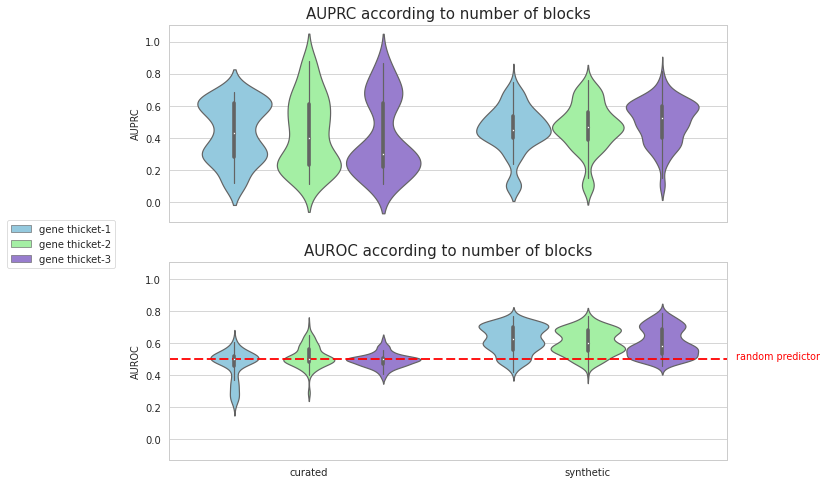

In [8]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10,8))
my_pal = {"gene thicket-1": "skyblue", "gene thicket-2":"palegreen", "gene thicket-3":"mediumpurple"}

sns.violinplot(x='data_type', y='AUPRC', hue='model_level', data=my_data_summary, palette=my_pal, ax=axs[0])
axs[0].set_title('AUPRC according to number of blocks', fontsize=15)
axs[0].legend('',frameon=False)
axs[0].set_xlabel('')
axs[0].tick_params(axis='both', labelsize=10)

graph = sns.violinplot(x='data_type', y='AUROC', hue='model_level', data=my_data_summary, palette=my_pal, ax=axs[1])
graph.axhline(0.5, color="r", dashes=(5, 2), linewidth=1.8)
graph.annotate('   random predictor', xy=(1.5,0.5), color='r')
axs[1].set_title('AUROC according to number of blocks', fontsize=15)
axs[1].legend('',frameon=False)
axs[1].set_xlabel('')
axs[1].tick_params(axis='both', labelsize=10)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.05, 0.54), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/n_blocks_metrics_all.png", dpi=150, transparent=True, bbox_inches='tight')

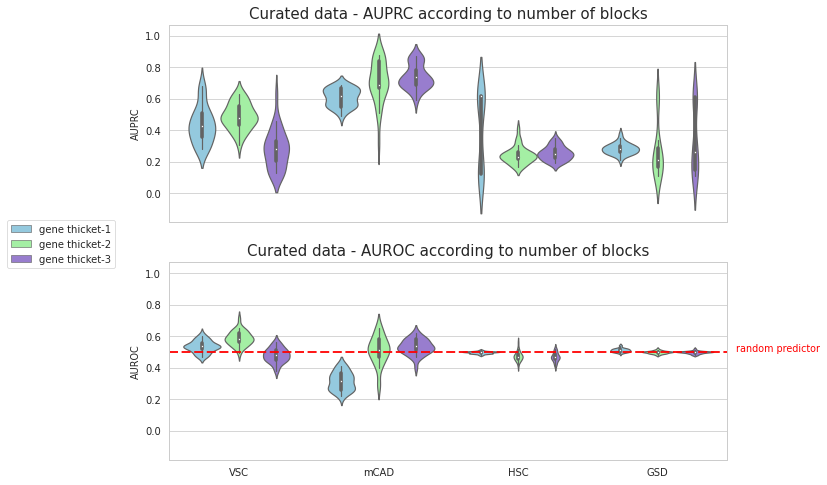

In [9]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10,8))

sns.violinplot(x='data_set', y='AUPRC', hue='model_level', data=my_data_summary[my_data_summary['data_type']=='curated'], palette=my_pal, ax=axs[0])
axs[0].set_title('Curated data - AUPRC according to number of blocks', fontsize=15)
axs[0].legend('',frameon=False)
axs[0].set_xlabel('')
axs[0].tick_params(axis='both', labelsize=10)

graph1 = sns.violinplot(x='data_set', y='AUROC', hue='model_level', data=my_data_summary[my_data_summary['data_type']=='curated'], palette=my_pal, ax=axs[1])
graph1.axhline(0.5, color="r", dashes=(5, 2), linewidth=1.8)
graph1.annotate('   random predictor', xy=(3.5,0.5), color='r')
axs[1].set_title('Curated data - AUROC according to number of blocks', fontsize=15)
axs[1].legend('',frameon=False)
axs[1].set_xlabel('')
axs[1].tick_params(axis='both', labelsize=10)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.05, 0.54), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/n_blocks_metrics_curated.png", dpi=150, transparent=True, bbox_inches='tight')

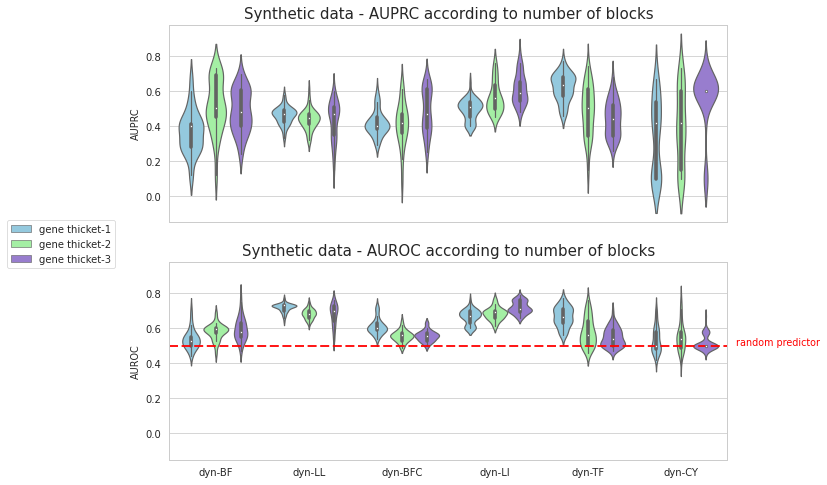

In [10]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10,8))

sns.violinplot(x='data_set', y='AUPRC', hue='model_level', data=my_data_summary[my_data_summary['data_type']=='synthetic'], palette=my_pal, ax=axs[0])
axs[0].set_title('Synthetic data - AUPRC according to number of blocks', fontsize=15)
axs[0].legend('',frameon=False)
axs[0].set_xlabel('')
axs[0].tick_params(axis='both', labelsize=10)

graph2 = sns.violinplot(x='data_set', y='AUROC', hue='model_level', data=my_data_summary[my_data_summary['data_type']=='synthetic'], palette=my_pal, ax=axs[1])
graph2.axhline(0.5, color="r", dashes=(5, 2), linewidth=1.8)
graph2.annotate('   random predictor', xy=(5.5,0.5), color='r')
axs[1].set_title('Synthetic data - AUROC according to number of blocks', fontsize=15)
axs[1].legend('',frameon=False)
axs[1].set_xlabel('')
axs[1].tick_params(axis='both', labelsize=10)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.05, 0.54), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/n_blocks_metrics_synthetic.png", dpi=150, transparent=True, bbox_inches='tight')

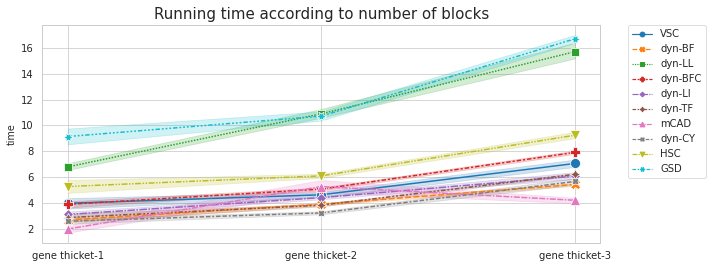

In [11]:
plt.figure(figsize=(10,4))
sns.lineplot(data=my_data_summary, x="model_level", y="time", hue="data_set", style="data_set", markers=True, linewidth = 1.5, markersize=10)
plt.title('Running time according to number of blocks', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('')
plt.tick_params(axis='both', labelsize=10)
plt.savefig("./Plots/time_blocks_lines.png", dpi=150, transparent=True, bbox_inches='tight')

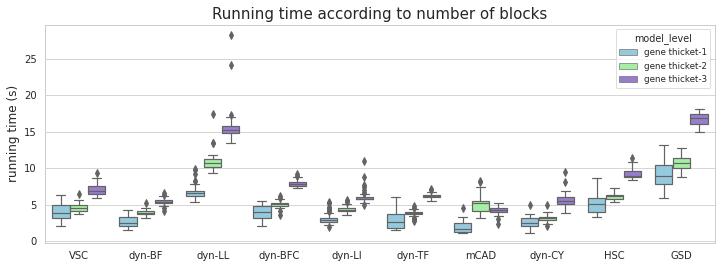

In [12]:
plt.figure(figsize=(12,4))
my_pal = {"gene thicket-1": "skyblue", "gene thicket-2":"palegreen", "gene thicket-3":"mediumpurple"}
order = ['gene thicket-1','gene thicket-2','gene thicket-3']
sns.boxplot(x='data_set', y='time', hue='model_level', hue_order = order, data=my_data_summary, palette=my_pal)
plt.title('Running time according to number of blocks', fontsize=15)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('')
plt.ylabel('running time (s)', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.savefig("./Plots/time_blocks_box.png", dpi=150, transparent=True, bbox_inches='tight')

In [13]:
#Selecting number of blocks
my_data_curated = my_data[(my_data['data_type']=='curated') & (my_data['levels']==1)]
my_data_synthetic = my_data[(my_data['data_type']=='synthetic') & (my_data['levels']==1)]
my_data = my_data_curated.append(my_data_synthetic).drop(['levels'], axis=1)

# TCDF

In [15]:
TCDF_data = pd.DataFrame()

for el in os.listdir(TCDF_path): 
    complete_path = os.path.join(TCDF_path, el) #iterate files
    if os.path.isfile(complete_path):
        name = el.split(sep='.')[0]
        levels = el.split(sep='_')[-2]
        temp_df = pd.read_csv(complete_path)
        temp_df.columns = ['name', 'fscore', 'AUPRC', 'AUROC', 'time']
        temp_df['data_set'] = el.split(sep='_')[0]
        drop_outs = np.array([int(el.split(sep='-')[-1]) for el in temp_df['name']])
        temp_df["drop_outs"] = np.where(drop_outs > 49, drop_outs, 0)
        data_type = np.array([el.split(sep='-')[0] for el in temp_df['name']])
        temp_df['data_type'] = np.where(data_type == 'dyn', 'synthetic', 'curated')
        temp_df['model'] = 'TCDF'
        temp_df['levels'] = int(levels)
        TCDF_data = TCDF_data.append(temp_df).reset_index(drop=True)

TCDF_data = TCDF_data[TCDF_data['levels']==1]
TCDF_data = TCDF_data.drop(['levels'], axis=1)

# Arboreto

In [18]:
model = ['genie3', 'grnboost2']
arboreto_data = pd.DataFrame()

for mod in model:
    complete_path = arboreto_path + mod + '/'
    for el in os.listdir(complete_path):
        if os.path.isfile(complete_path + el):
            temp_df = pd.read_csv(complete_path + el)
            temp_df.columns = ['name', 'fscore', 'AUPRC', 'AUROC', 'time']
            temp_df['data_set'] = el.split(sep='.')[0]
            drop_outs = np.array([int(el.split(sep='-')[-1]) for el in temp_df['name']])
            temp_df["drop_outs"] = np.where(drop_outs > 49, drop_outs, 0)
            data_type = np.array([el.split(sep='-')[0] for el in temp_df['name']])
            temp_df['data_type'] = np.where(data_type == 'dyn', 'synthetic', 'curated')
            temp_df['model'] = mod
            arboreto_data = arboreto_data.append(temp_df).reset_index(drop=True)

# SINCERITIES

In [19]:
sincerities_curated = pd.read_csv(sincerities_path + 'curated.csv')
sincerities_synthetic = pd.read_csv(sincerities_path + 'synthetic.csv')

sincerities_synthetic['data'] = 'dyn-' + sincerities_synthetic['data']

sincerities_curated.columns = ['name','fscore','AUPRC','AUROC','data_set']
sincerities_synthetic.columns = ['name','fscore','AUPRC','AUROC','data_set']

times_curated = pd.DataFrame({'time': np.genfromtxt(sincerities_path + "times_curated.txt", delimiter=" ").flatten(),
                              'name': pd.read_csv(sincerities_path + "names_curated.txt", sep="\t", header=None).values.flatten()}) 
times_synthetic = pd.DataFrame({'time': np.genfromtxt(sincerities_path + "times_synthetic.txt", delimiter=" ").flatten(),
                                'name': pd.read_csv(sincerities_path + "names_synthetic.txt", sep="\t", header=None).values.flatten()}) 

sincerities_curated = pd.merge(sincerities_curated, times_curated, on="name")
sincerities_synthetic = pd.merge(sincerities_synthetic, times_synthetic, on="name")

sincerities_curated['data_type'] = 'curated'
sincerities_synthetic['data_type'] = 'synthetic'
sincerities_data = sincerities_synthetic.append(sincerities_curated)

drop_outs = np.array([int(el.split(sep='-')[-1]) for el in sincerities_data['name']])
sincerities_data["drop_outs"] = np.where(drop_outs > 49, drop_outs, 0)

sincerities_data['model'] = 'sincerities'

## merge everything

In [20]:
results = my_data.append(TCDF_data).append(arboreto_data).append(sincerities_data).reset_index(drop=True)
cur = results[results['data_type']=='curated'].copy()
syn = results[results['data_type']=='synthetic'].copy()

# CURATED DATA

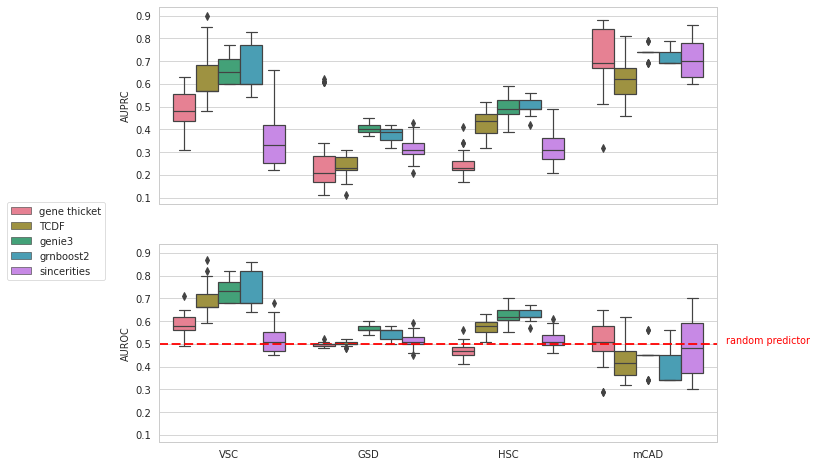

In [21]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10,8))

sns.boxplot(data=cur, x="data_set", y="AUPRC", hue="model", palette=sns.color_palette("husl", 5), ax=axs[0])
axs[0].legend('',frameon=False)
axs[0].set_xlabel('')
axs[0].tick_params(axis='both', labelsize=10)

graph2 = sns.boxplot(data=results[results['data_type']=='curated'], x="data_set", y="AUROC", hue="model", palette=sns.color_palette("husl", 5), ax=axs[1])
graph2.axhline(0.5, color="r", dashes=(5, 2), linewidth=1.8)
graph2.annotate('   random predictor', xy=(3.5,0.5), color='r')
axs[1].legend('',frameon=False)
axs[1].set_xlabel('')
axs[1].tick_params(axis='both', labelsize=10)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.05, 0.54), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/curated_metrics.png", dpi=150, transparent=True, bbox_inches='tight')

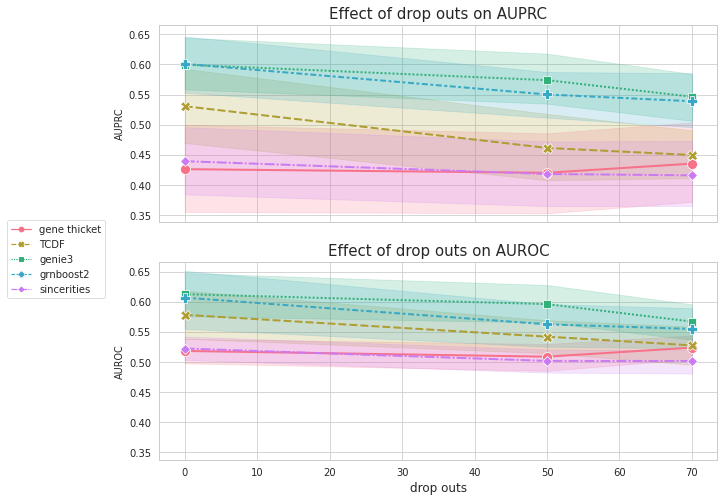

In [22]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10,8))

sns.lineplot(data=results[results['data_type']=='curated'], x="drop_outs", y="AUPRC", hue="model", style= 'model', markers=True, linewidth = 2, markersize=10, palette=sns.color_palette("husl", 5), ax=axs[0])
axs[0].set_title('Effect of drop outs on AUPRC', fontsize=15)
axs[0].legend('',frameon=False)
axs[0].set_xlabel('')
axs[0].tick_params(axis='both', labelsize=10)

sns.lineplot(data=results[results['data_type']=='curated'], x="drop_outs", y="AUROC", hue="model", style= 'model', markers=True, linewidth = 2, markersize=10, palette=sns.color_palette("husl", 5), ax=axs[1])
axs[1].legend('',frameon=False)
axs[1].set_title('Effect of drop outs on AUROC', fontsize=15)
axs[1].set_xlabel('drop outs', fontsize=12)
axs[1].tick_params(axis='both', labelsize=10)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.05, 0.54), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/dropouts_metrics.png", dpi=150, transparent=True, bbox_inches='tight')

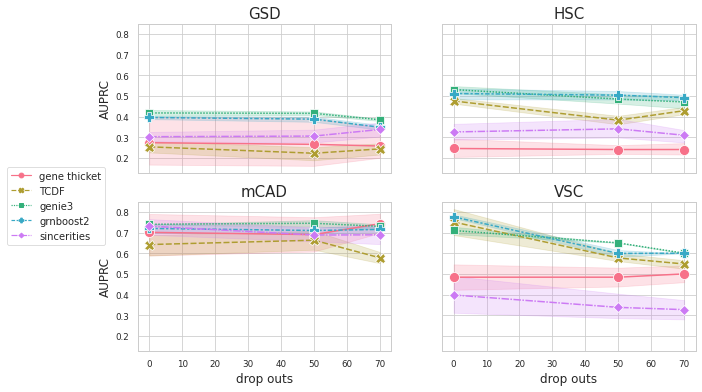

In [23]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,6))

sns.lineplot(data=cur[cur['data_set']=='GSD'], x="drop_outs", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[0,0])
axs[0,0].set_title('GSD', fontsize=15)
axs[0,0].legend('', frameon=False)
axs[0,0].set_ylabel('AUPRC', fontsize=12)

sns.lineplot(data=cur[cur['data_set']=='HSC'], x="drop_outs", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[0,1])
axs[0,1].set_title('HSC', fontsize=15)
axs[0,1].legend('', frameon=False)

sns.lineplot(data=cur[cur['data_set']=='mCAD'], x="drop_outs", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[1,0])
axs[1,0].set_title('mCAD', fontsize=15)
axs[1,0].legend('', frameon=False)
axs[1,0].set_ylabel('AUPRC', fontsize=12)
axs[1,0].set_xlabel('drop outs', fontsize=12)

sns.lineplot(data=cur[cur['data_set']=='VSC'], x="drop_outs", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[1,1])
axs[1,1].set_title('VSC', fontsize=15)
axs[1,1].legend('', frameon=False)
axs[1,1].set_xlabel('drop outs', fontsize=12)

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.08, 0.55), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/dropouts_AUPRC_split.png", dpi=150, transparent=True, bbox_inches='tight')

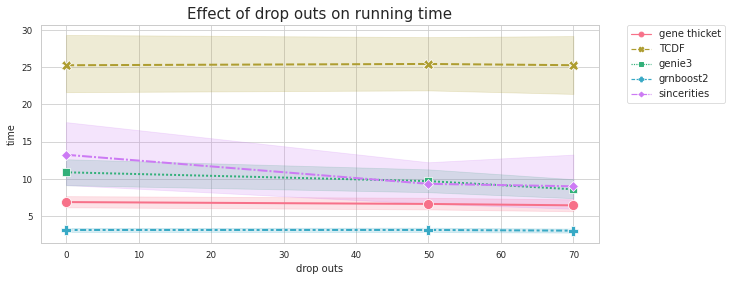

In [24]:
plt.figure(figsize=(10,4))
sns.lineplot(data=results[results['data_type']=='curated'], x="drop_outs", y="time", hue="model", style= 'model', markers=True, linewidth = 2, markersize=10, palette=sns.color_palette("husl", 5))
plt.title('Effect of drop outs on running time', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., prop={'size': 10}, loc=2)
plt.xlabel('drop outs', fontsize=10)
plt.savefig("./Plots/Dropouts_time.png", dpi=150, transparent=True, bbox_inches='tight')

# SYNTHETIC DATA

In [26]:
syn['n_cells'] = np.array([int(el.split(sep='-')[-2]) for el in syn['name']])

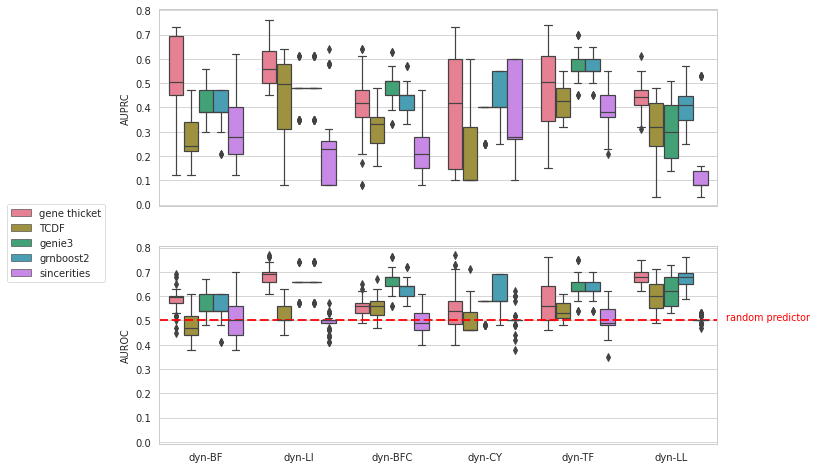

In [27]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10,8))

sns.boxplot(data=syn, x="data_set", y="AUPRC", hue="model", palette=sns.color_palette("husl", 5), ax=axs[0])
axs[0].legend('',frameon=False)
axs[0].set_xlabel('')
axs[0].tick_params(axis='both', labelsize=10)

graph2 = sns.boxplot(data=syn, x="data_set", y="AUROC", hue="model", palette=sns.color_palette("husl", 5), ax=axs[1])
graph2.axhline(0.5, color="r", dashes=(5, 2), linewidth=1.8)
graph2.annotate('   random predictor', xy=(5.5,0.5), color='r')
axs[1].legend('',frameon=False)
axs[1].set_xlabel('')
axs[1].tick_params(axis='both', labelsize=10)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.05, 0.54), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/synthetic_metrics.png", dpi=150, transparent=True, bbox_inches='tight')

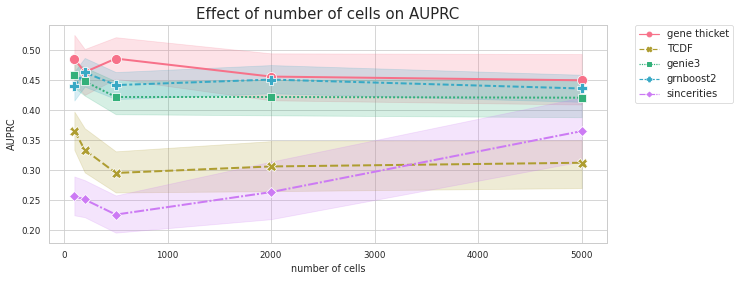

In [28]:
plt.figure(figsize=(10,4))
sns.lineplot(data=syn, x="n_cells", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 2, markersize=10)
plt.title('Effect of number of cells on AUPRC', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('number of cells')
plt.savefig("./Plots/n_cells_AUPRC.png", dpi=150, transparent=True, bbox_inches='tight')

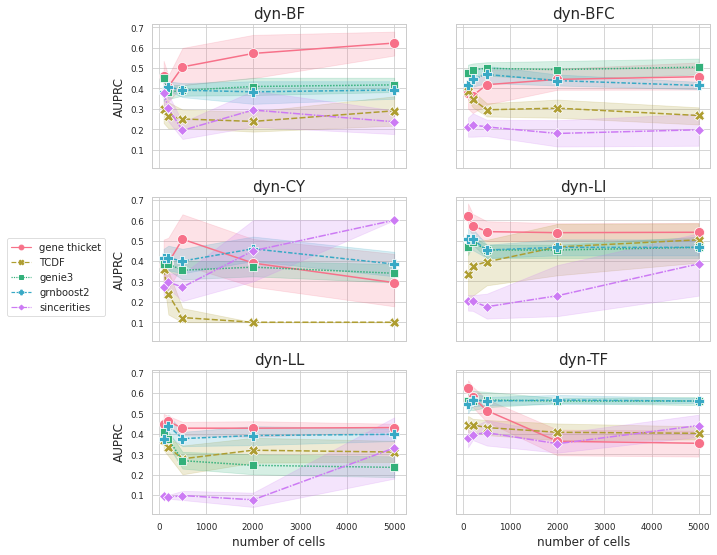

In [29]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10,9))

sns.lineplot(data=syn[syn['data_set']=='dyn-BF'], x="n_cells", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[0,0])
axs[0,0].set_title('dyn-BF', fontsize=15)
axs[0,0].legend('', frameon=False)
axs[0,0].set_ylabel('AUPRC', fontsize=12)

sns.lineplot(data=syn[syn['data_set']=='dyn-BFC'], x="n_cells", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[0,1])
axs[0,1].set_title('dyn-BFC', fontsize=15)
axs[0,1].legend('', frameon=False)

sns.lineplot(data=syn[syn['data_set']=='dyn-CY'], x="n_cells", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[1,0])
axs[1,0].set_title('dyn-CY', fontsize=15)
axs[1,0].legend('', frameon=False)
axs[1,0].set_ylabel('AUPRC', fontsize=12)

sns.lineplot(data=syn[syn['data_set']=='dyn-LI'], x="n_cells", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[1,1])
axs[1,1].set_title('dyn-LI', fontsize=15)
axs[1,1].legend('', frameon=False)

sns.lineplot(data=syn[syn['data_set']=='dyn-LL'], x="n_cells", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[2,0])
axs[2,0].set_title('dyn-LL', fontsize=15)
axs[2,0].legend('', frameon=False)
axs[2,0].set_xlabel('number of cells', fontsize=12)
axs[2,0].set_ylabel('AUPRC', fontsize=12)

sns.lineplot(data=syn[syn['data_set']=='dyn-TF'], x="n_cells", y="AUPRC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[2,1])
axs[2,1].set_title('dyn-TF', fontsize=15)
axs[2,1].legend('', frameon=False)
axs[2,1].set_xlabel('number of cells', fontsize=12)

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.06, 0.55), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/n_cells_AUPRC_split.png", dpi=150, transparent=True, bbox_inches='tight')

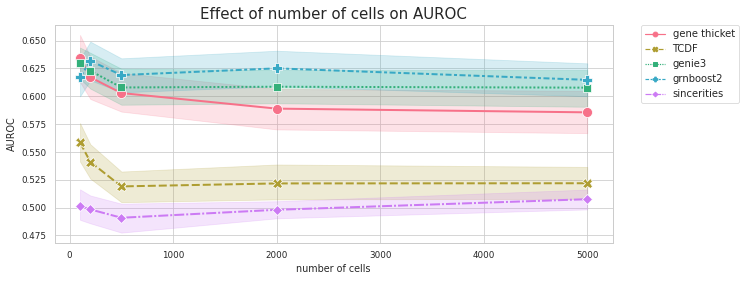

In [30]:
plt.figure(figsize=(10,4))
sns.lineplot(data=syn, x="n_cells", y="AUROC", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 2, markersize=10)
plt.title('Effect of number of cells on AUROC', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('number of cells')
plt.savefig("./Plots/n_cells_AUROC.png", dpi=150, transparent=True, bbox_inches='tight')

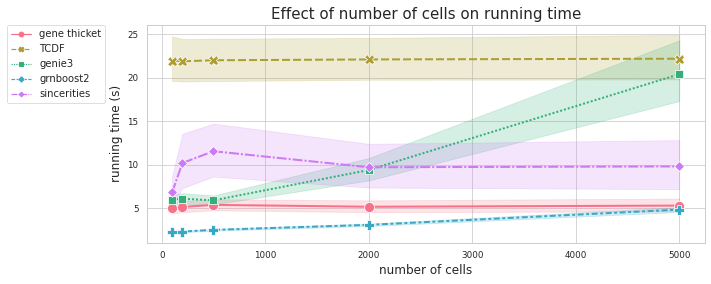

In [31]:
plt.figure(figsize=(10,4))
sns.lineplot(data=syn, x="n_cells", y="time", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 2, markersize=10)
plt.title('Effect of number of cells on running time', fontsize=15)
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('number of cells', fontsize=12)
plt.ylabel('running time (s)', fontsize=12)
plt.savefig("./Plots/n_cells_time.png", dpi=150, transparent=True, bbox_inches='tight')

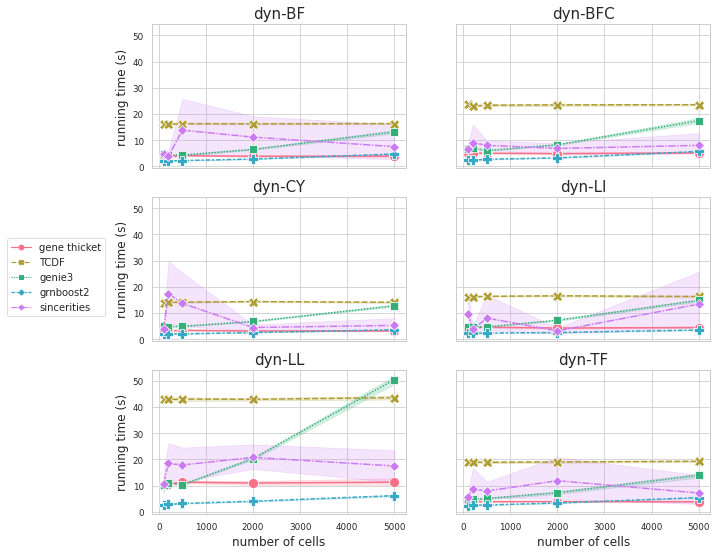

In [32]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10,9))

sns.lineplot(data=syn[syn['data_set']=='dyn-BF'], x="n_cells", y="time", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[0,0])
axs[0,0].set_title('dyn-BF', fontsize=15)
axs[0,0].legend('', frameon=False)
axs[0,0].set_ylabel('running time (s)', fontsize=12)

sns.lineplot(data=syn[syn['data_set']=='dyn-BFC'], x="n_cells", y="time", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[0,1])
axs[0,1].set_title('dyn-BFC', fontsize=15)
axs[0,1].legend('', frameon=False)

sns.lineplot(data=syn[syn['data_set']=='dyn-CY'], x="n_cells", y="time", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[1,0])
axs[1,0].set_title('dyn-CY', fontsize=15)
axs[1,0].legend('', frameon=False)
axs[1,0].set_ylabel('running time (s)', fontsize=12)

sns.lineplot(data=syn[syn['data_set']=='dyn-LI'], x="n_cells", y="time", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[1,1])
axs[1,1].set_title('dyn-LI', fontsize=15)
axs[1,1].legend('', frameon=False)

sns.lineplot(data=syn[syn['data_set']=='dyn-LL'], x="n_cells", y="time", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[2,0])
axs[2,0].set_title('dyn-LL', fontsize=15)
axs[2,0].legend('', frameon=False)
axs[2,0].set_xlabel('number of cells', fontsize=12)
axs[2,0].set_ylabel('running time (s)', fontsize=12)

sns.lineplot(data=syn[syn['data_set']=='dyn-TF'], x="n_cells", y="time", hue="model", style="model", palette=sns.color_palette("husl", 5), markers=True, linewidth = 1.5, markersize=10, ax=axs[2,1])
axs[2,1].set_title('dyn-TF', fontsize=15)
axs[2,1].legend('', frameon=False)
axs[2,1].set_xlabel('number of cells', fontsize=12)

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.06, 0.55), loc=1, borderaxespad=0., prop={'size': 10})
plt.savefig("./Plots/n_cells_time_split.png", dpi=150, transparent=True, bbox_inches='tight')

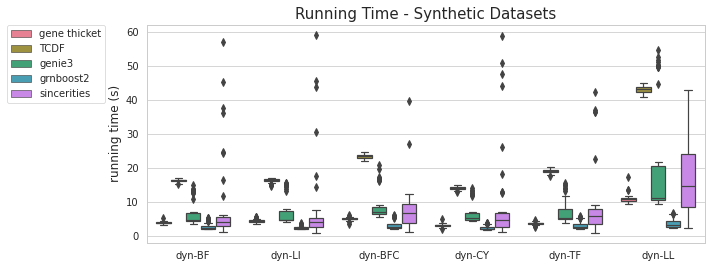

In [33]:
plt.figure(figsize=(10,4))
sns.boxplot(data=syn, x="data_set", y="time", hue="model", palette=sns.color_palette("husl", 5))
plt.title('Running Time - Synthetic Datasets', fontsize=15)
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('')
plt.ylabel('running time (s)', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.savefig("./Plots/time_synthetic.png", dpi=150, transparent=True, bbox_inches='tight')

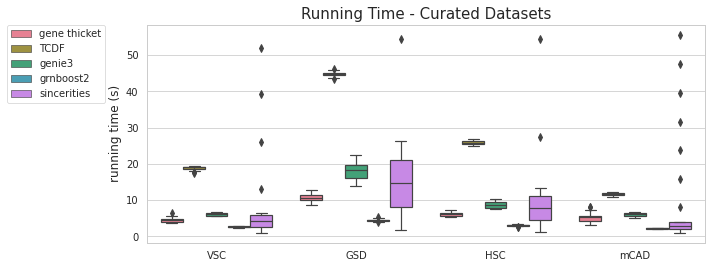

In [34]:
plt.figure(figsize=(10,4))
sns.boxplot(data=results[results['data_type']=='curated'], x="data_set", y="time", hue="model", palette=sns.color_palette("husl", 5))
plt.title('Running Time - Curated Datasets', fontsize=15)
plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('')
plt.ylabel('running time (s)', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.savefig("./Plots/time_curated.png", dpi=150, transparent=True, bbox_inches='tight')

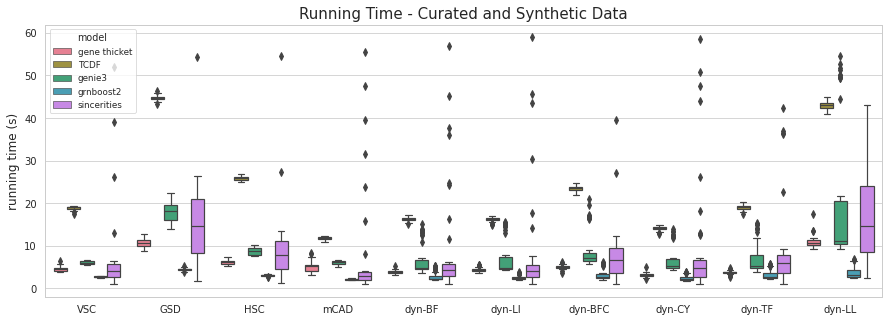

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(data=results, x="data_set", y="time", hue="model", palette=sns.color_palette("husl", 5))
plt.title('Running Time - Curated and Synthetic Data', fontsize=15)
#plt.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.xlabel('')
plt.ylabel('running time (s)', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.savefig("./Plots/time_all.png", dpi=150, transparent=True, bbox_inches='tight')

## BEST PERFORMING NETWORKS OF EACH DATASET

In [36]:
my_data

,name,fscore,AUPRC,AUROC,time,data_set,drop_outs,data_type,model
130,VSC-2000-8-50,0.20,0.38,0.53,4.13,VSC,50,curated,gene thicket
131,VSC-2000-10-70,0.41,0.49,0.60,4.49,VSC,70,curated,gene thicket
132,VSC-2000-6,0.20,0.38,0.53,6.49,VSC,0,curated,gene thicket
133,VSC-2000-5-70,0.47,0.54,0.64,4.09,VSC,70,curated,gene thicket
134,VSC-2000-6-70,0.35,0.48,0.58,3.76,VSC,70,curated,gene thicket
...,...,...,...,...,...,...,...,...,...
1255,dyn-LL-5000-1,0.35,0.37,0.65,17.43,dyn-LL,0,synthetic,gene thicket
1256,dyn-LL-5000-5,0.42,0.44,0.70,9.99,dyn-LL,0,synthetic,gene thicket
1257,dyn-LL-500-10,0.42,0.45,0.68,11.05,dyn-LL,0,synthetic,gene thicket
1258,dyn-LL-200-4,0.42,0.45,0.68,10.20,dyn-LL,0,synthetic,gene thicket


In [37]:
uni_names = np.unique([d_set for d_set in my_data['data_set']])

In [38]:
best_dfs = []

for name in uni_names:
    temp_name = my_data[my_data['data_set']==name].sort_values(by='AUPRC', ascending=False)[:1]['name'].values
    best_dfs = np.append(best_dfs,temp_name, axis=0)

In [39]:
best_dfs

array(['GSD-2000-3', 'HSC-2000-7', 'VSC-2000-1-70', 'dyn-BF-2000-3',
       'dyn-BFC-5000-4', 'dyn-CY-500-10', 'dyn-LI-200-4', 'dyn-LL-100-4',
       'dyn-TF-200-9', 'mCAD-2000-6'], dtype=object)

In [36]:
best_links = {}

for el in best_dfs:
    if el.split('-')[0] != 'dyn':
        string = el.split('-')[0]
    else:
        string = el.split('-')[0] + '-' + el.split('-')[1]
    with open('./Results_earlys_new_nodrop/My_model/' + string + '/links/' + string + '_0_levels_links.pickle', 'rb') as handle:
        temp = pickle.load(handle)
        best_links[el] = temp[el]

In [38]:
best_grn_matrix = {}
for grn in best_links:
    best_grn_matrix[grn] = pd.pivot_table(best_links[grn], values='importance', index=['TF'], columns = ['target'], aggfunc=np.sum).fillna(0)

In [39]:
best_grn_matrix.keys()

dict_keys(['GSD-2000-3', 'HSC-2000-7', 'VSC-2000-1-70', 'dyn-BF-2000-3', 'dyn-BFC-5000-4', 'dyn-CY-500-10', 'dyn-LI-200-4', 'dyn-LL-100-4', 'dyn-TF-200-9', 'mCAD-2000-6'])

### ~~~~~~~~~~~~~~~~ mCAD ~~~~~~~~~~~~~~~~~

In [53]:
mcad_ref = pd.read_csv('./beeline_data/curated/mCAD/mCAD-2000-6/refNetwork.csv')

In [55]:
mcad_ref = mcad_ref.replace('+',1)
mcad_ref = mcad_ref.replace('-', -1)

In [56]:
mcad_matrix = pd.pivot(mcad_ref, values='Type', index=['Gene1'], columns=['Gene2']).fillna(0)

In [40]:
best_grn_matrix['mCAD-2000-6']

target,Coup,Emx2,Fgf8,Pax6,Sp8
TF,,,,,
Coup,0.000000,1.666759,0.000000,0.000000,0.000000
Emx2,1.734382,0.000000,0.000000,0.000000,-1.336655
Fgf8,0.000000,0.000000,0.000000,1.179422,0.000000
Pax6,-1.495098,-1.369387,1.168849,0.000000,1.352404
Sp8,0.000000,0.000000,1.442838,1.372957,0.000000


<AxesSubplot:xlabel='target', ylabel='TF'>

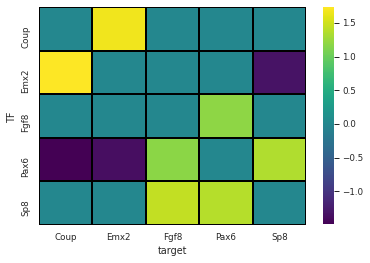

In [41]:
sns.heatmap(best_grn_matrix['mCAD-2000-6'], cmap='viridis', cbar=True, linecolor='k', linewidths=0.1)

<AxesSubplot:xlabel='Gene2', ylabel='Gene1'>

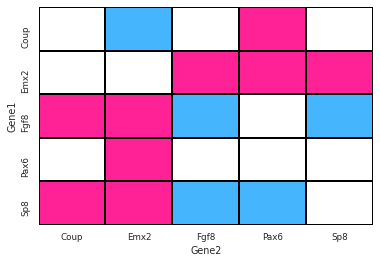

In [58]:
colors = ['#ff2196f3', '#ffffff', '#45b6fe']
pal = sns.color_palette(colors)
sns.heatmap(mcad_matrix, cmap=pal, cbar=False, linecolor='k', linewidths=0.1)